![](https://miro.medium.com/v2/resize:fit:1400/1*WqId29D5dN_8DhiYQcHa2w.png)

# **Importing Libraries**

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# **Loading the Data**

---





In [ ]:
df = pd.read_csv('Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **EDA**

---



In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Exited'].value_counts()
# Now we can see how many users exited our credit card

,count
Exited,
0,7963
1,2037


In [ ]:
df['Geography'].value_counts()
#We can see the credit card users all over different countries.

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df['Gender'].value_counts()
#We can see the gender distribution

,count
Gender,
Male,5457
Female,4543


In [ ]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'] , axis = 1)
#Dropping the unnecessary columns

In [ ]:
#after removing columns
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA Visualization



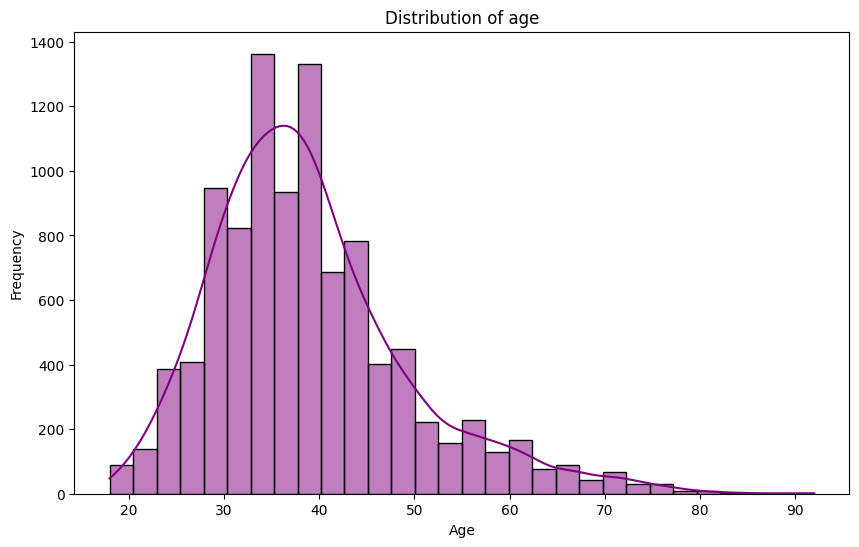

In [ ]:
# Plot 1: Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30,color='purple',kde=True)
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Observation- As per the graph we have maximum user in range btw 30-40

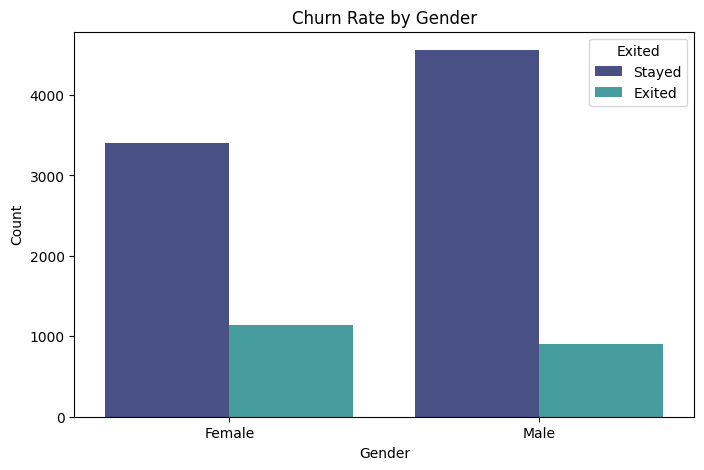

In [ ]:
# Plot 2: Churn Rate by Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Exited', data=df, palette="mako")
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Stayed', 'Exited'])
plt.show()

Observation- As per the graph female users exited more over the male users

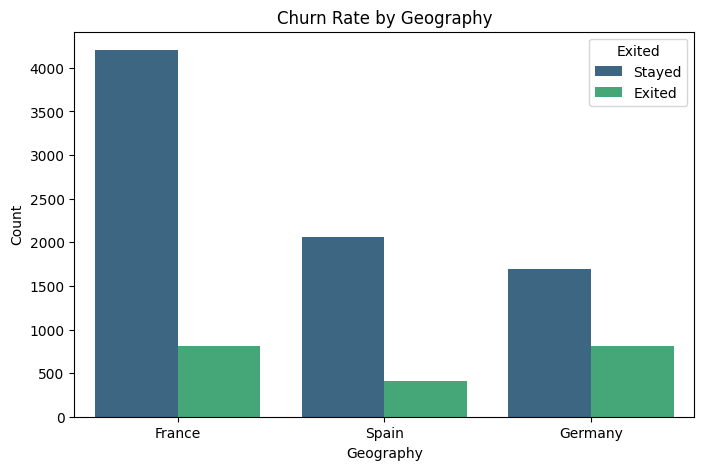

In [ ]:
# Plot 3: Churn Rate by Geography
plt.figure(figsize=(8, 5))
sns.countplot(x='Geography', hue='Exited', data=df, palette='viridis')
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Stayed', 'Exited'])
plt.show()

Observation-


1.  As per the graph we can see that France have more stayed users than the rest of the countries.

2.   Germany users are exiting at a 50% ratio







# **One-Hot Encoding**

---



In [ ]:
data = pd.get_dummies(df , columns = ['Geography' , 'Gender'] , drop_first = True)
data = data.astype(int)

In [ ]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


# **Data Splitting**

---



In [ ]:
X = data.drop(['Exited'] , axis = 1)
y = data['Exited']

In [ ]:
X_train , X_test , y_train , y_test =train_test_split(X , y , test_size = 0.2 , random_state = 42)

# **Feature Scaling**

---



In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

# **Building The ANN Model Architecture**

---



In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import plot_model

In [ ]:
model = Sequential()
model.add(Dense(5 , activation = 'relu' , input_dim = 11))
model.add(Dense(10 , activation = 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

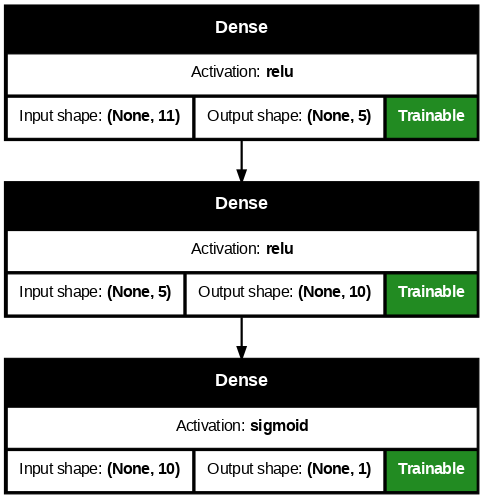

In [ ]:
plot_model(
    model ,
    show_shapes = True ,
    dpi = 80,
    show_layer_activations = True,
    show_trainable = True
)

In [ ]:
model.compile(loss ='binary_crossentropy' , optimizer = 'Adam' , metrics=['accuracy'])

# **Training the model**

---



In [ ]:
history= model.fit(X_train , y_train , epochs = 100 ,validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8515 - loss: 0.3640 - val_accuracy: 0.8550 - val_loss: 0.3701
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8572 - loss: 0.3556 - val_accuracy: 0.8550 - val_loss: 0.3640
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8576 - loss: 0.3492 - val_accuracy: 0.8556 - val_loss: 0.3593
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8600 - loss: 0.3428 - val_accuracy: 0.8550 - val_loss: 0.3567
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8549 - loss: 0.3499 - val_accuracy: 0.8556 - val_loss: 0.3550
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8573 - loss: 0.3522 - val_accuracy: 0.8556 - val_loss: 0.3519
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8580 - loss: 0.3448 - val_accuracy: 0.8569 - val_loss: 0.3503
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8653 - loss: 0.3369 - val_ac

# **Prediction on Test Data**

---



In [ ]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
Y_pred = np.where(y_pred > 0.5 , 1 , 0)
# 0 Representing stayed and 1 Representing exited

In [ ]:
Y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
accuracy_score(y_test , Y_pred)

0.86

In [ ]:
X_test

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [ ]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])